# Parkinsons EEG with PCA, LR and ANN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("s3programmer/parkison-diseases-eeg-dataset")

print("Path to dataset files:", path)

/Users/evakhromeeva/Projects/BeSMPSegmentation/.conda/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/evakhromeeva/.cache/kagglehub/datasets/s3programmer/parkison-diseases-eeg-dataset/versions/3


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

path = '/Users/evakhromeeva/.cache/kagglehub/datasets/s3programmer/parkison-diseases-eeg-dataset/versions/3/'
df = pd.read_csv(path + 'pd_EEG_features.csv')


In [5]:
df.head()

,id,gender,PPE,EEG,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
df.shape

(756, 755)

# Is the data well balanced?

<Axes: xlabel='class', ylabel='count'>

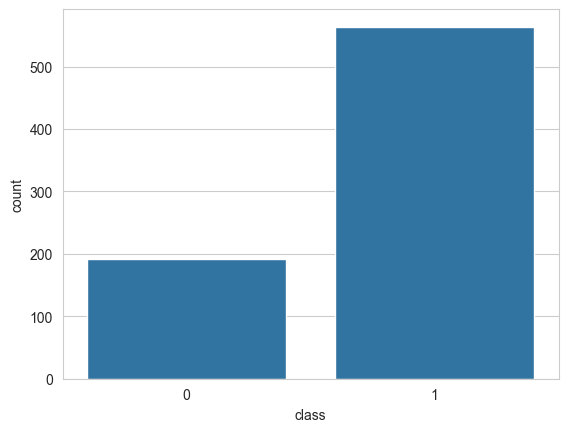

In [8]:
sns.countplot(x=df['class'])   # Data is not well balanced, this will effect the accuracy of any model

In [9]:
positive = (df['class'] == 1).sum()/len(df['class'])*100
print(f'Proportion of data points which are positive for Parkinsons Disease is: ', '{:.2f}'.format(positive), '%')
print('The data is not well balanced, this will effect the accuracy of any model.')

Proportion of data points which are positive for Parkinsons Disease is:  74.60 %
The data is not well balanced, this will effect the accuracy of any model.


# What is the gender divide?

<Axes: xlabel='gender', ylabel='count'>

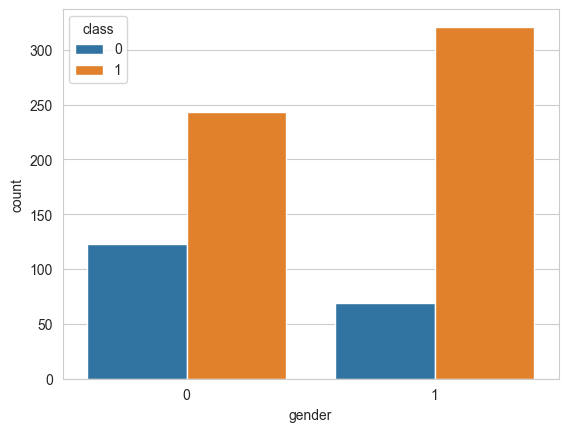

In [10]:
sns.countplot(x=df['gender'], hue = df['class'])

In [11]:
df.isnull().sum().sum()

0

In [12]:
duplicates = df.duplicated()
duplicates.sum()

1

In [13]:
df.drop_duplicates(keep='first')

,id,gender,PPE,EEG,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


# Discussion - Data PreProcessing

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('class', axis=1)

In [16]:
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# It is necessary to Normalise the data before PCA using StandardScaler.
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(6.915284155011557e-16,
 1.0000000000000002,
 -0.006908548717029101,
 1.0911611128221876)

In [21]:
# Loading the PCA module:
from sklearn.decomposition import PCA

my_PCA = PCA(n_components=2)
X_train_pca = my_PCA.fit_transform(X_train)
X_test_pca = my_PCA.transform(X_test)

In [22]:
X_train_Df = pd.DataFrame(data = X_train_pca, columns = ['principal component 1', 'principal component 2'])

In [23]:
X_train_Df.head()

,principal component 1,principal component 2
0,-16.269882,-4.213320
1,-3.789291,-14.762461
2,8.458924,-16.535224
3,6.882258,-5.117388
4,-2.228182,13.730600


In [24]:
print('Explained variation per principal component: {}'.format(my_PCA.explained_variance_ratio_))

Explained variation per principal component: [0.13155992 0.09279559]


This analysis shows that principal comonent 1 contains 13% of the explained variance, and principal component 2 only another 9%. This will be insufficient to get a good model; more principal components will be needed.

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

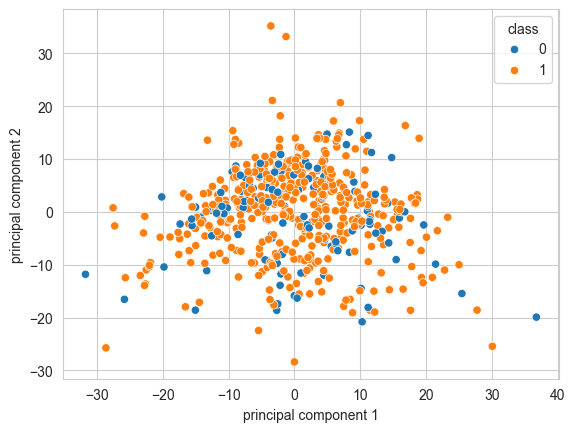

In [25]:
# Plotting the two principal components against each other
sns.scatterplot(data=X_train_Df, x='principal component 1', y='principal component 2', hue=df['class'])

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

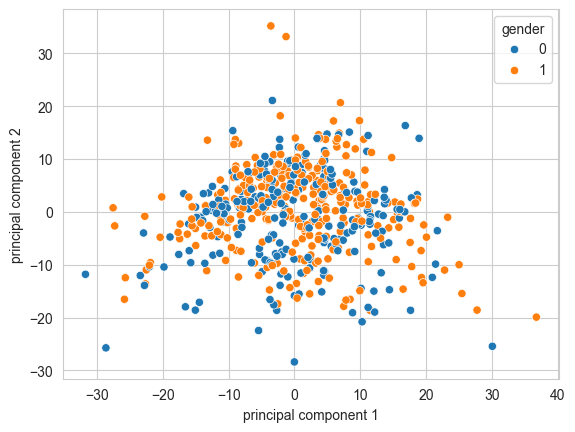

In [26]:
# Plotting the two principal components against each other
sns.scatterplot(data=X_train_Df, x='principal component 1', y='principal component 2', hue=df['gender'])

# Perform Logistic Regression

In [27]:
# This time we request that 90% of the variance is retained by allowing as many principal components as necessary

my_PCA = PCA(0.8)
X_train_pca = my_PCA.fit_transform(X_train)
X_test_pca = my_PCA.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_model = LogisticRegression()
log_model.fit(X_train_pca, y_train)

LogisticRegression()

In [30]:
predictions = log_model.predict(X_test_pca)

# Analysing Logistic Regression Model

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        51
           1       0.85      0.93      0.89       138

    accuracy                           0.83       189
   macro avg       0.80      0.75      0.77       189
weighted avg       0.82      0.83      0.82       189



In [33]:
print(confusion_matrix(y_test, predictions, labels = [1,0]))

[[128  10]
 [ 22  29]]


# ANN Model

Let's look to see if a neural network model can give improved predictions of Parkinson's Disease

In [34]:
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode ='min', verbose=1, patience=15)

In [36]:
model = Sequential()
model.add(Dense(150, activation = 'relu'))
model.add(Dense(75, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam')

In [39]:
model.fit(x=X_train_pca, y=y_train, epochs=600, validation_data = (X_test_pca, y_test), callbacks=[early_stop])

Epoch 1/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7039 - val_loss: 0.4264
Epoch 2/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3913 - val_loss: 0.3794
Epoch 3/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3173 - val_loss: 0.3560
Epoch 4/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2567 - val_loss: 0.3386
Epoch 5/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1912 - val_loss: 0.3203
Epoch 6/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1737 - val_loss: 0.3280
Epoch 7/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1429 - val_loss: 0.3161
Epoch 8/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1174 - val_loss: 0.3128
Epoch 9/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0846 - val_loss: 0.2984
Epoch 10/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0767 - val_loss: 0.3089
Epoch 11/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0492 - val_loss: 0.3157
Epoch 12/600
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0

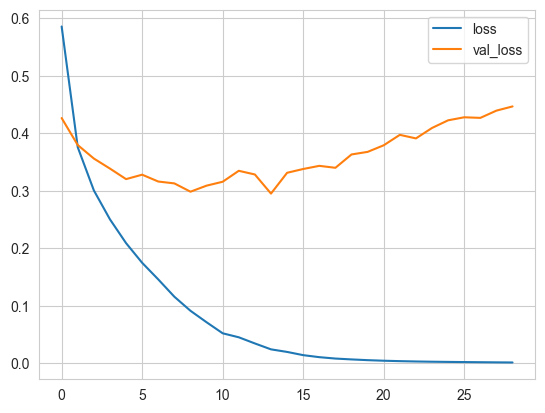

In [40]:
losses = pd.DataFrame(model.history.history).plot()

In [41]:
predict = (model.predict(X_test_pca)>0.5).astype('int32')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# Analysing ANN Model

In [42]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74        51
           1       0.90      0.93      0.91       138

    accuracy                           0.87       189
   macro avg       0.84      0.82      0.83       189
weighted avg       0.86      0.87      0.87       189



In [43]:
print(confusion_matrix(y_test, predict, labels = [1,0]))

[[128  10]
 [ 15  36]]


After my first draft of this notebook, I have returned and done some work to optimise the ANN model, increasing the number of starting neurons, adding a layer and experimenting with drop out layers. The dropout layers gave no benefit, but I have retained the first two modifications. With these, the ANN now gives better results than the logistic regression.

Precision: Out of all the candidates that the model predicted would have Parkinson's Disease, 91% actually did (85% for Logistic Regression model). Out of all the candidates that the model predicted would not have Parkinson's Disease, 81% of those did not have Parkinson's Disease (74% for logistic regression).

Recall: Out of all the candidates that actually did have Parkinson's Disease, the model predicted this outcome correctly for 93% (92% for logistic regression). However, out of all the candidates did not have Parkinson's Disease, the model predicted this outcome correctly for 75% (57% for logistic regression).

In the confusion matrix, the false negative figure of 9 out of 189, and the false positive figure of 13 out of 189 might be considered too high, depending upon where this test is used alongside others. Clinicians, after all, will want to avoid giving either the false hope or unnecessary short term stress that an incorrect model output would give.

In considering these results, it is important to keep in mind that the data constituted positive tests in 75% of the tests done. This imbalance will clearly effect the accuracy of the model, and in this light the recall and precision results for positive predictions are encouraging. In addition to the data inbalance I suspect that there are significant correlations between different features in the dataset, which are compromising the usefulness of the data. I shall leave it to other Kagglers to find an elegant method to hunt these out among the 755 features!

Overall, one might conclude that this model could be a good, rapid first check that suggests that further tests should be done, or a final confirmation when all other tests suggest a positive result. However, it is not good enough to be a diagnostic tool in itself.

# Conclusions
With a highly unbalanced dataset, it is not suprising that a highly accurate model cannot be achieved.

Using PCA to reduce the dimensionality of the dataset did not result in significantly improved predictions.

This is suggestive of highly correlated features, which should be removed to improve the accuracy of a model.

Overall, clinicians might want to use the model as a first good check suggesting that further investigation is warranted, but it is not a diagntic tool.